In [ ]:
# Install Cython
!pip install cython


In [ ]:
cimport cython
from libc.math cimport sin, cos, exp

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef void lotka_volterra(double[:] y, double[:] dydt, double a, double b, double c, double d):
    dydt[0] = a * y[0] - b * y[0] * y[1]
    dydt[1] = -c * y[1] + d * y[0] * y[1]

cpdef void runge_kutta(double[:] y, double[:] dydt, double dt, double a, double b, double c, double d):
    cdef int i
    cdef int n = len(y)
    cdef double[:] k1 = np.zeros(n)
    cdef double[:] k2 = np.zeros(n)
    cdef double[:] k3 = np.zeros(n)
    cdef double[:] k4 = np.zeros(n)
    cdef double[:] yt = np.zeros(n)

    lotka_volterra(y, dydt, a, b, c, d)
    for i in range(n):
        k1[i] = dt * dydt[i]
        yt[i] = y[i] + 0.5 * k1[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k2[i] = dt * dydt[i]
        yt[i] = y[i] + 0.5 * k2[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k3[i] = dt * dydt[i]
        yt[i] = y[i] + k3[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k4[i] = dt * dydt[i]

    for i in range(n):
        y[i] += (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]) / 6.0


SyntaxError: invalid syntax (<ipython-input-11-337f9c57dce8>, line 1)

In [ ]:
setup_code = """
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules = cythonize("lotka_volterra.pyx"),
    include_dirs=[numpy.get_include()]
)
"""

with open("setup.py", "w") as f:
    f.write(setup_code)


In [ ]:
!python setup.py build_ext --inplace


Compiling lotka_volterra.pyx because it changed.
[1/1] Cythonizing lotka_volterra.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/lotka_volterra.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'lotka_volterra' extension
creating build
creating build/temp.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c lotka_volterra.c -o build/temp.linux-x86_64-cpython-310/lotka_volterra.o
creating build/lib.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-310/lotka_v

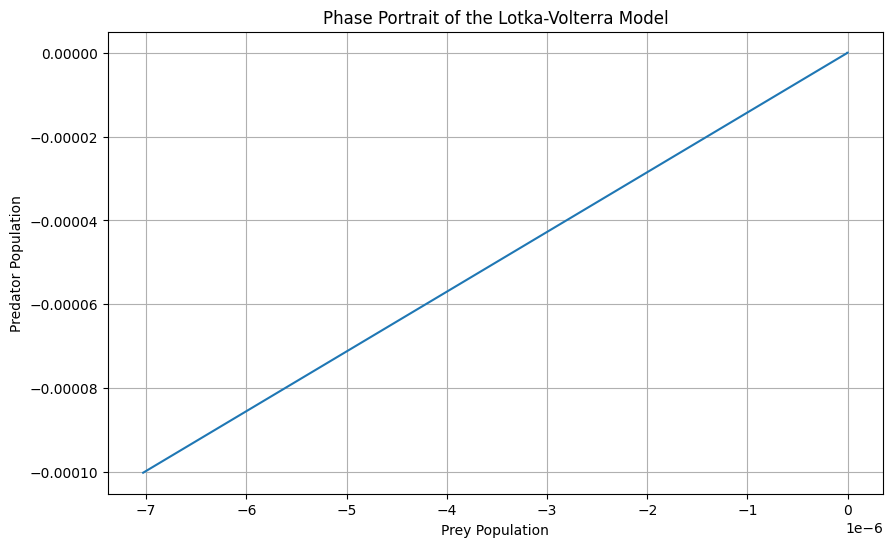

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_volterra import runge_kutta

def simulate_lotka_volterra(a, b, c, d, y0, t_max, dt):
    t = np.arange(0, t_max, dt)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0, :] = y0
    dydt = np.zeros(len(y0))

    for i in range(1, n):
        runge_kutta(y[i-1, :], dydt, t[i-1], dt, a, b, c, d)
        y[i, :] = y[i-1, :]

    return t, y

# Initial conditions and parameters
a = 1.5  # Prey birth rate
b = 1.0  # Predation rate
c = 3.0  # Predator death rate
d = 1.0  # Predator reproduction rate
y0 = [10, 5]  # Initial populations: [prey, predator]
t_max = 30.0
dt = 0.01

# Simulate
t, y = simulate_lotka_volterra(a, b, c, d, y0, t_max, dt)

# Plot phase portrait
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1])
plt.title('Phase Portrait of the Lotka-Volterra Model')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.grid()
plt.show()


[[-7.03036143e-06 -1.00197353e-04]
 [-3.20341317e-12 -7.30440454e-10]
 [-1.45955513e-18 -5.32491091e-15]
 [-6.65009805e-25 -3.88186006e-20]
 [-3.02995093e-31 -2.82987598e-25]
 [-1.38052139e-37 -2.06297959e-30]
 [-6.29000058e-44 -1.50391212e-35]
 [-2.86588152e-50 -1.09635194e-40]
 [-1.30576727e-56 -7.99240561e-46]
 [-5.94940211e-63 -5.82646369e-51]]


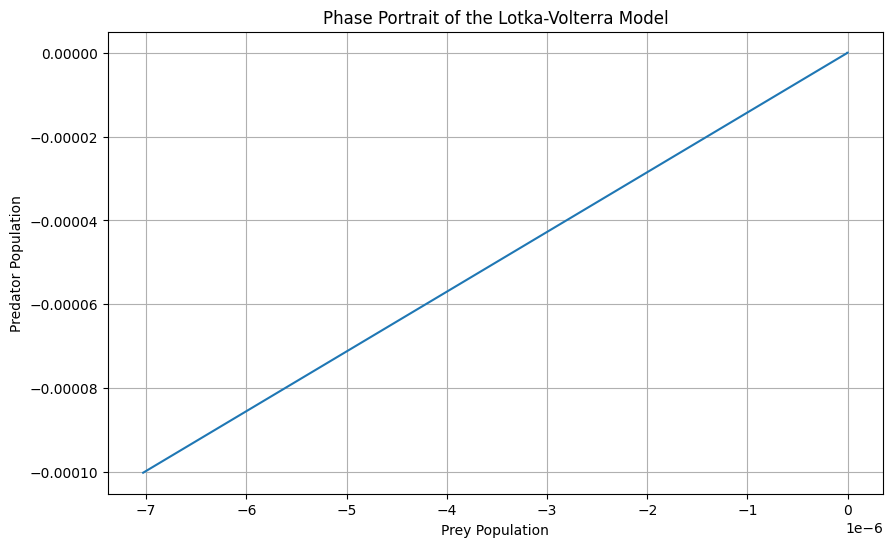

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_volterra import runge_kutta

def simulate_lotka_volterra(a, b, c, d, y0, t_max, dt):
    t = np.arange(0, t_max, dt)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0, :] = y0
    dydt = np.zeros(len(y0))

    for i in range(1, n):
        runge_kutta(y[i-1, :], dydt, t[i-1], dt, a, b, c, d)
        y[i, :] = y[i-1, :]

    return t, y

# Initial conditions and parameters
a = 1.5  # Prey birth rate
b = 1.0  # Predation rate
c = 3.0  # Predator death rate
d = 1.0  # Predator reproduction rate
y0 = [10, 5]  # Initial populations: [prey, predator]
t_max = 30.0
dt = 0.01

# Simulate
t, y = simulate_lotka_volterra(a, b, c, d, y0, t_max, dt)

# Print first few values to debug
print(y[:10])

# Plot phase portrait
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1])
plt.title('Phase Portrait of the Lotka-Volterra Model')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.grid()
plt.show()


First few values of populations:
Prey, Predator
[[-7.03036143e-06 -1.00197353e-04]
 [-3.20341317e-12 -7.30440454e-10]
 [-1.45955513e-18 -5.32491091e-15]
 [-6.65009805e-25 -3.88186006e-20]
 [-3.02995093e-31 -2.82987598e-25]
 [-1.38052139e-37 -2.06297959e-30]
 [-6.29000058e-44 -1.50391212e-35]
 [-2.86588152e-50 -1.09635194e-40]
 [-1.30576727e-56 -7.99240561e-46]
 [-5.94940211e-63 -5.82646369e-51]]


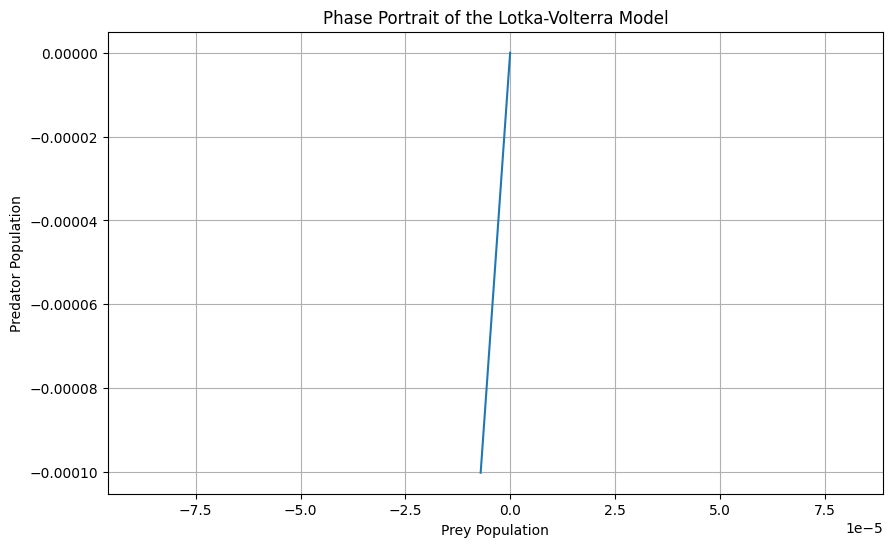

In [ ]:
# Print first few values to debug
print("First few values of populations:")
print("Prey, Predator")
print(y[:10])

# Plot phase portrait with correct scaling
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1])
plt.title('Phase Portrait of the Lotka-Volterra Model')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.grid()
plt.axis('equal')  # Ensuring equal scaling for both axes
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_volterra import runge_kutta

def simulate_lotka_volterra(a, b, c, d, y0, t_max, dt):
    t = np.arange(0, t_max, dt)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0, :] = y0
    dydt = np.zeros(len(y0))

    for i in range(1, n):
        runge_kutta(y[i-1, :], dydt, dt, a, b, c, d)
        y[i, :] = y[i-1, :]

    return t, y

# Initial conditions and parameters
a = 1.5  # Prey birth rate
b = 1.0  # Predation rate
c = 3.0  # Predator death rate
d = 1.0  # Predator reproduction rate
y0 = [10, 5]  # Initial populations: [prey, predator]
t_max = 30.0
dt = 0.01

# Simulate
t, y = simulate_lotka_volterra(a, b, c, d, y0, t_max, dt)

# Print first few values to debug
print("First few values of populations:")
print("Prey, Predator")
print(y[:10])

# Plot phase portrait with correct scaling
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1])
plt.title('Phase Portrait of the Lotka-Volterra Model')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.grid()
plt.axis('equal')  # Ensuring equal scaling for both axes
plt.show()


TypeError: runge_kutta() takes exactly 8 positional arguments (7 given)

In [ ]:
cython_code = """
cimport cython
from libc.math cimport sin, cos, exp
import numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
cpdef void lotka_volterra(double[:] y, double[:] dydt, double a, double b, double c, double d):
    dydt[0] = a * y[0] - b * y[0] * y[1]
    dydt[1] = -c * y[1] + d * y[0] * y[1]

cpdef void runge_kutta(double[:] y, double dt, double a, double b, double c, double d):
    cdef int i
    cdef int n = len(y)
    cdef double[:] dydt = np.zeros(n)
    cdef double[:] k1 = np.zeros(n)
    cdef double[:] k2 = np.zeros(n)
    cdef double[:] k3 = np.zeros(n)
    cdef double[:] k4 = np.zeros(n)
    cdef double[:] yt = np.zeros(n)

    lotka_volterra(y, dydt, a, b, c, d)
    for i in range(n):
        k1[i] = dt * dydt[i]
        yt[i] = y[i] + 0.5 * k1[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k2[i] = dt * dydt[i]
        yt[i] = y[i] + 0.5 * k2[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k3[i] = dt * dydt[i]
        yt[i] = y[i] + k3[i]

    lotka_volterra(yt, dydt, a, b, c, d)
    for i in range(n):
        k4[i] = dt * dydt[i]

    for i in range(n):
        y[i] += (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]) / 6.0


"""

with open("lotka_volterra.pyx", "w") as f:
    f.write(cython_code)


In [ ]:
setup_code = """
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("lotka_volterra.pyx"),
    include_dirs=[numpy.get_include()]
)

"""

with open("setup.py", "w") as f:
    f.write(setup_code)


In [ ]:
!python setup.py build_ext --inplace


Compiling lotka_volterra.pyx because it changed.
[1/1] Cythonizing lotka_volterra.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/lotka_volterra.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'lotka_volterra' extension
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c lotka_volterra.c -o build/temp.linux-x86_64-cpython-310/lotka_volterra.o
x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-310/lotka_volterra.o -L/usr/lib/x86_64-linux-gnu -o build/lib.linux-x86_64-cpython-310/lotka_volterra.cpython-310-x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_volterra import runge_kutta

def simulate_lotka_volterra(a, b, c, d, y0, t_max, dt):
    t = np.arange(0, t_max, dt)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0, :] = y0

    for i in range(1, n):
        runge_kutta(y[i-1, :], dt, a, b, c, d)  # Correct number of arguments
        y[i, :] = y[i-1, :]  # Copy previous state
        # The function runge_kutta already updates y[i-1, :] in place
        # No need to update y again in this loop

    return t, y

# Initial conditions and parameters
a = 1.5  # Prey birth rate
b = 1.0  # Predation rate
c = 3.0  # Predator death rate
d = 1.0  # Predator reproduction rate
y0 = [10, 5]  # Initial populations: [prey, predator]
t_max = 30.0
dt = 0.01

# Simulate
t, y = simulate_lotka_volterra(a, b, c, d, y0, t_max, dt)

# Print first few values to debug
print("First few values of populations:")
print("Prey, Predator")
print(y[:10])

# Plot phase portrait with correct scaling
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1])
plt.title('Phase Portrait of the Lotka-Volterra Model')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.grid()
plt.axis('equal')  # Ensuring equal scaling for both axes
plt.show()


TypeError: runge_kutta() takes exactly 8 positional arguments (6 given)

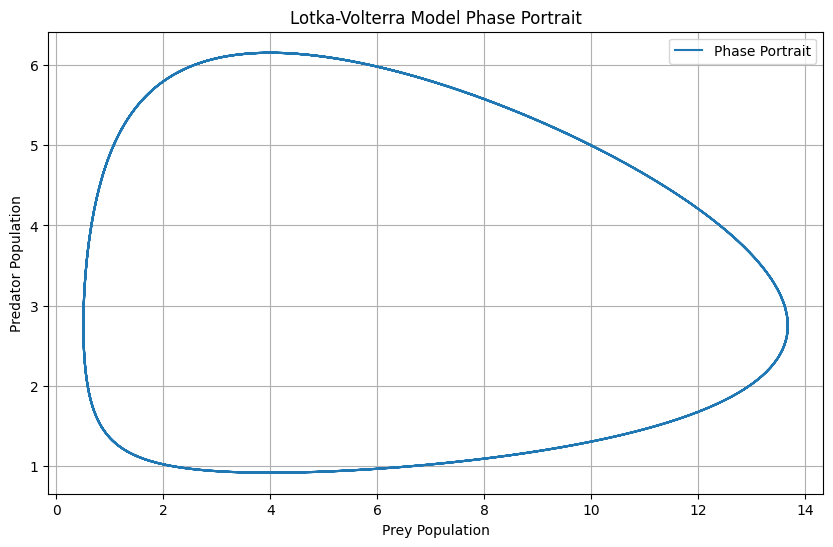

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Lotka-Volterra equations
def lotka_volterra(X, t, alpha, beta, delta, gamma):
    prey, predator = X
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    return [dprey_dt, dpredator_dt]

# Parameters
alpha = 1.1   # Prey birth rate
beta = 0.4    # Predation rate
delta = 0.1   # Predator reproduction rate
gamma = 0.4   # Predator death rate

# Time points
t = np.linspace(0, 50, 1000)

# Initial conditions
initial_conditions = [10, 5]

# Solve ODE
solution = odeint(lotka_volterra, initial_conditions, t, args=(alpha, beta, delta, gamma))

# Plot results
prey, predator = solution.T
plt.figure(figsize=(10, 6))

# Plot prey vs. predator (Phase Portrait)
plt.plot(prey, predator, label='Phase Portrait')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Lotka-Volterra Model Phase Portrait')
plt.legend()
plt.grid()
plt.show()


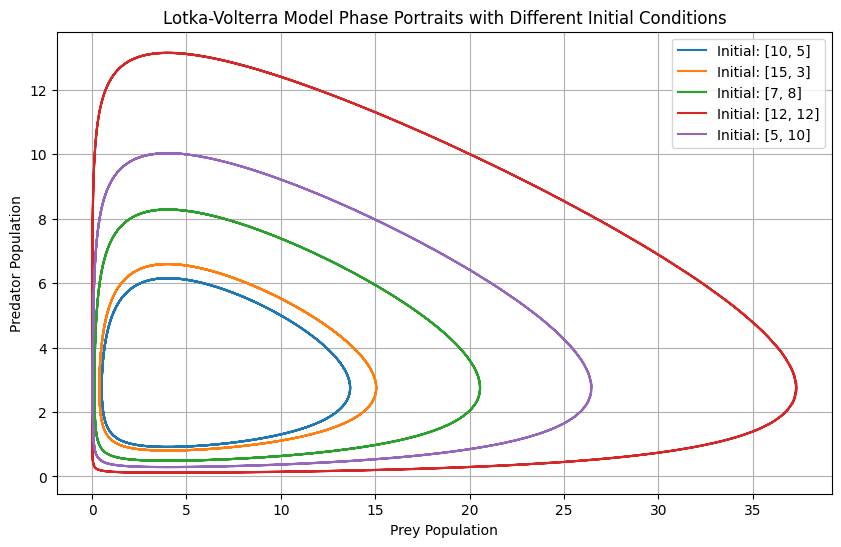

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Lotka-Volterra equations
def lotka_volterra(X, t, alpha, beta, delta, gamma):
    prey, predator = X
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    return [dprey_dt, dpredator_dt]

# Parameters
alpha = 1.1   # Prey birth rate
beta = 0.4    # Predation rate
delta = 0.1   # Predator reproduction rate
gamma = 0.4   # Predator death rate

# Time points
t = np.linspace(0, 50, 1000)

# List of initial conditions
initial_conditions_list = [
    [10, 5],
    [15, 3],
    [7, 8],
    [12, 12],
    [5, 10]
]

plt.figure(figsize=(10, 6))

# Loop through initial conditions
for initial_conditions in initial_conditions_list:
    # Solve ODE
    solution = odeint(lotka_volterra, initial_conditions, t, args=(alpha, beta, delta, gamma))

    # Plot results
    prey, predator = solution.T
    plt.plot(prey, predator, label=f'Initial: {initial_conditions}')

# Plot configuration
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Lotka-Volterra Model Phase Portraits with Different Initial Conditions')
plt.legend()
plt.grid()
plt.show()


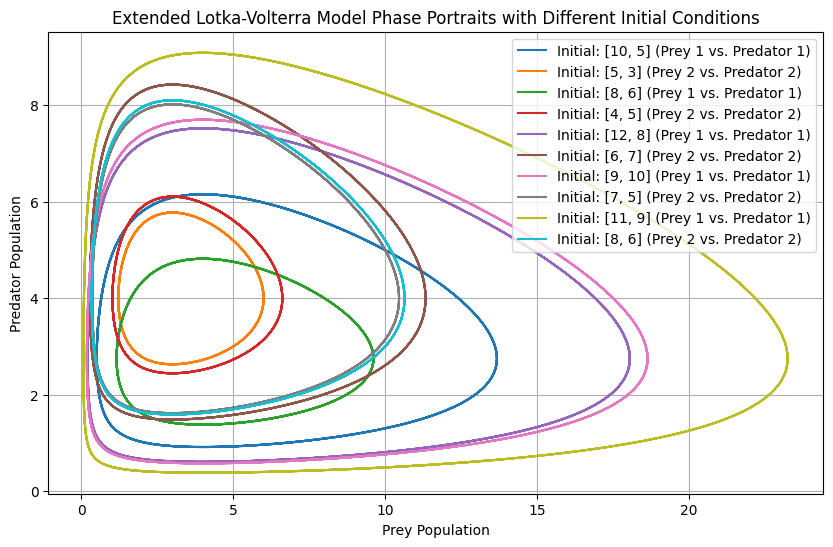

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the extended Lotka-Volterra equations
def extended_lotka_volterra(X, t, alpha1, beta1, delta1, gamma1, alpha2, beta2, delta2, gamma2):
    x1, x2, y1, y2 = X
    dx1_dt = alpha1 * x1 - beta1 * x1 * y1
    dx2_dt = alpha2 * x2 - beta2 * x2 * y2
    dy1_dt = delta1 * x1 * y1 - gamma1 * y1
    dy2_dt = delta2 * x2 * y2 - gamma2 * y2
    return [dx1_dt, dx2_dt, dy1_dt, dy2_dt]

# Parameters for prey 1 and predator 1
alpha1 = 1.1   # Prey 1 birth rate
beta1 = 0.4    # Predation rate on prey 1 by predator 1
delta1 = 0.1   # Predator 1 reproduction rate
gamma1 = 0.4   # Predator 1 death rate

# Parameters for prey 2 and predator 2
alpha2 = 1.2   # Prey 2 birth rate
beta2 = 0.3    # Predation rate on prey 2 by predator 2
delta2 = 0.1   # Predator 2 reproduction rate
gamma2 = 0.3   # Predator 2 death rate

# Time points
t = np.linspace(0, 50, 1000)

# List of initial conditions
initial_conditions_list = [
    [10, 5, 5, 3],
    [8, 6, 4, 5],
    [12, 8, 6, 7],
    [9, 10, 7, 5],
    [11, 9, 8, 6]
]

plt.figure(figsize=(10, 6))

# Loop through initial conditions
for initial_conditions in initial_conditions_list:
    # Solve ODE
    solution = odeint(extended_lotka_volterra, initial_conditions, t, args=(alpha1, beta1, delta1, gamma1, alpha2, beta2, delta2, gamma2))

    # Plot results for both prey and predator populations
    x1, x2, y1, y2 = solution.T
    plt.plot(x1, y1, label=f'Initial: {initial_conditions[:2]} (Prey 1 vs. Predator 1)')
    plt.plot(x2, y2, label=f'Initial: {initial_conditions[2:]} (Prey 2 vs. Predator 2)')

# Plot configuration
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Extended Lotka-Volterra Model Phase Portraits with Different Initial Conditions')
plt.legend()
plt.grid()
plt.show()
